### Há diferença entre os níveis de comercialização (produtor vs. atacado)?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\digital college\DA18\PYTHON\Projeto_Unidade_3\_5_Dataframes_tratados\dados_completos.csv')

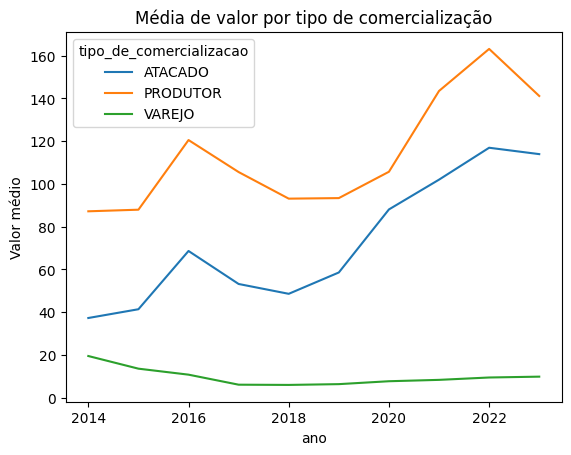

In [ ]:

# 1. Agrupar os dados por tipo de comercialização e ano, calculando estatísticas
comparativo = df.groupby(['tipo_de_comercializacao', 'ano'])['valor'].agg(['mean', 'median', 'std', 'count']).unstack(level=0)

# 2. Visualizar as médias ao longo dos anos
comparativo['mean'].plot(kind='line', title='Média de valor por tipo de comercialização')
plt.ylabel('Valor médio')
plt.show()


### Diferença Varejo x Atacado x Produtor

Estatísticas descritivas:
        id_Produto/Unidade  id_Nível de Comercialização        id_U.F.  \
count       240528.000000                240528.000000  240528.000000   
mean          1049.767312                     2.869737      14.157304   
std            172.463674                     0.783579       7.556597   
min            452.000000                     2.000000       1.000000   
25%            908.000000                     2.000000       8.000000   
50%           1025.000000                     3.000000      14.000000   
75%           1188.000000                     4.000000      20.000000   
max           1548.000000                     4.000000      27.000000   

             id_data          valor  id_macrogrupo        ano_mes  \
count  240528.000000  240528.000000  240528.000000  240528.000000   
mean       61.657254      71.826356       5.114299  201866.143784   
std        33.290790     209.676686       3.518816     275.949320   
min         1.000000       0.000000    

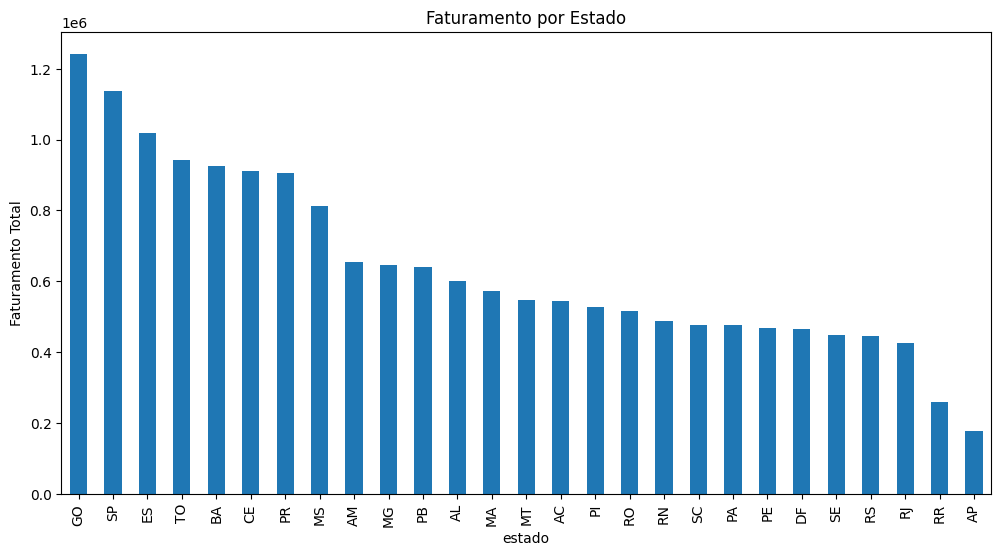

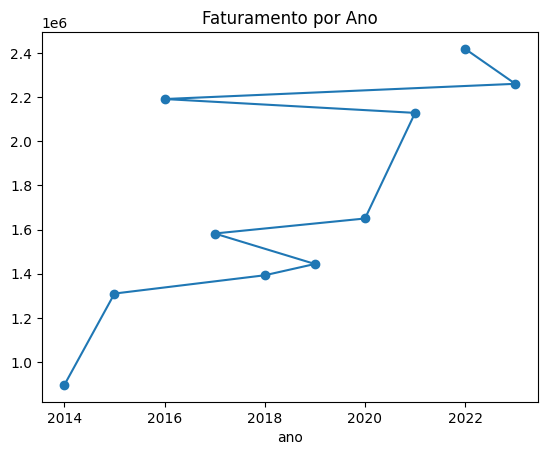

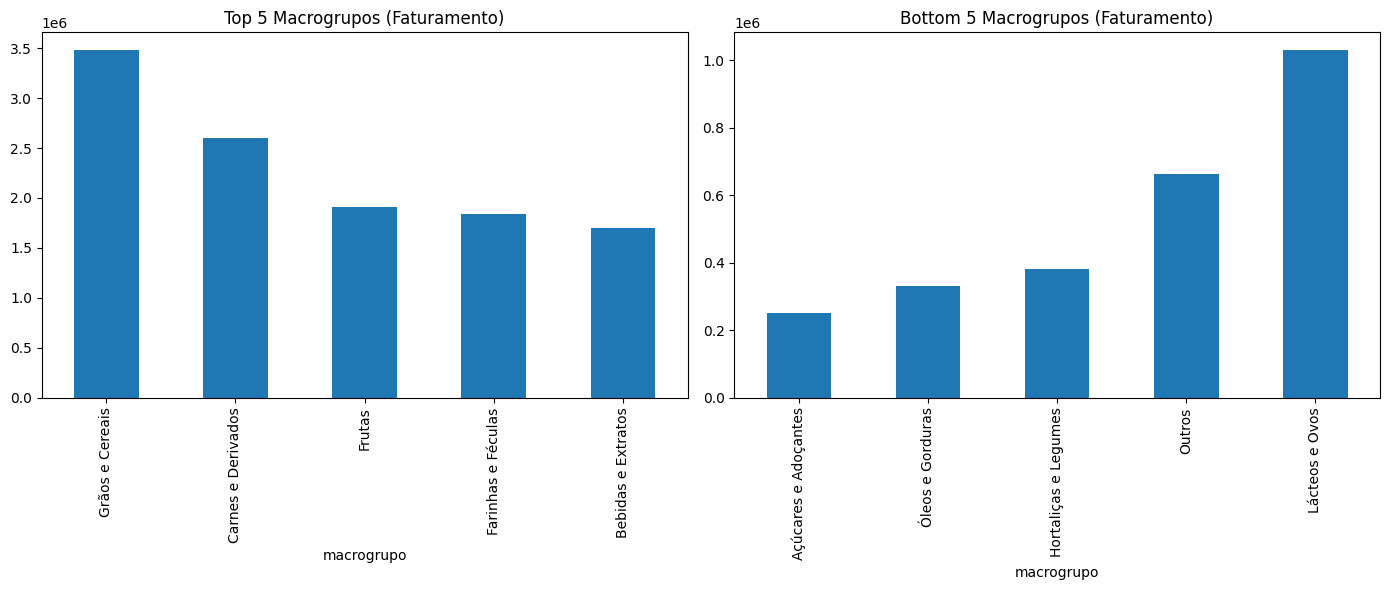

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7552\3698075408.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


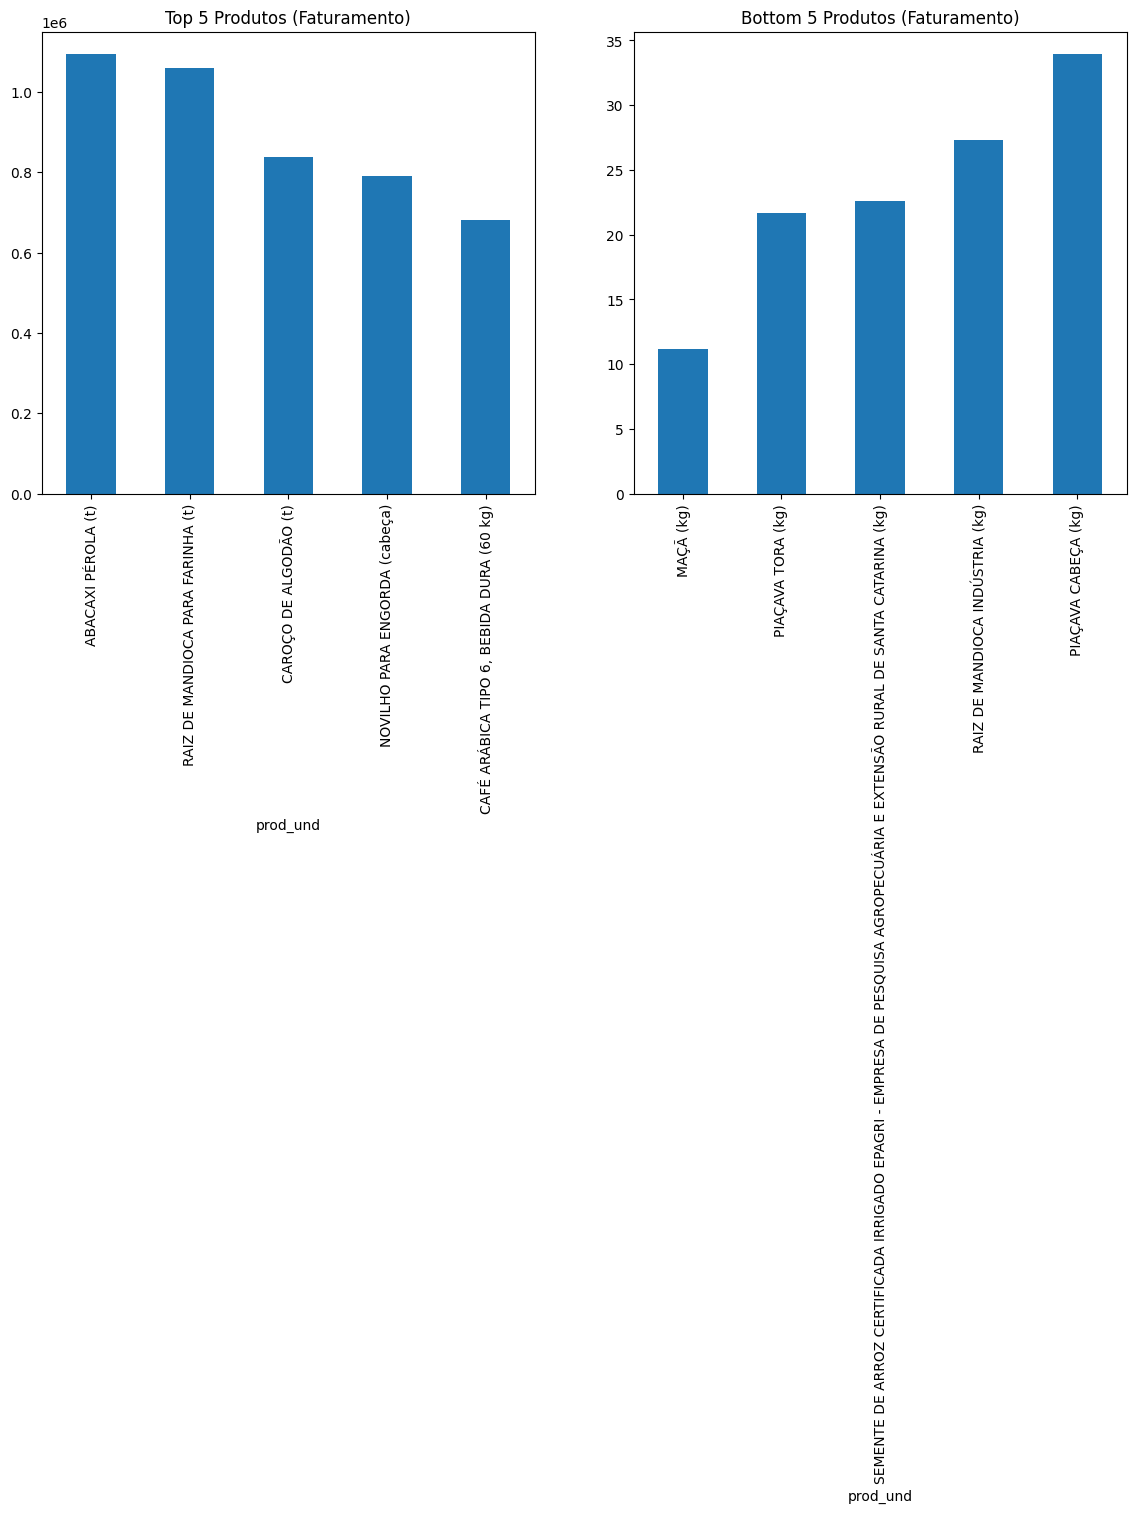

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise básica
print("Estatísticas descritivas:\n", df.describe())

# 1. Qual estado faturou mais
faturamento_estado = df.groupby('estado')['valor'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
faturamento_estado.plot(kind='bar', title='Faturamento por Estado')
plt.ylabel('Faturamento Total')
plt.show()

# 2. Qual ano faturou mais
faturamento_ano = df.groupby('ano')['valor'].sum().sort_values(ascending=False)
faturamento_ano.plot(kind='line', marker='o', title='Faturamento por Ano')
plt.show()

# 3. Top 5 macrogrupos mais vendidos
top_macrogrupo = df.groupby('macrogrupo')['valor'].sum().nlargest(5)
bottom_macrogrupo = df.groupby('macrogrupo')['valor'].sum().nsmallest(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
top_macrogrupo.plot(kind='bar', ax=ax1, title='Top 5 Macrogrupos (Faturamento)')
bottom_macrogrupo.plot(kind='bar', ax=ax2, title='Bottom 5 Macrogrupos (Faturamento)')
plt.tight_layout()
plt.show()

# 4. Top 5 produtos mais vendidos
top_produtos = df.groupby('prod_und')['valor'].sum().nlargest(5)
bottom_produtos = df.groupby('prod_und')['valor'].sum().nsmallest(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
top_produtos.plot(kind='bar', ax=ax1, title='Top 5 Produtos (Faturamento)')
bottom_produtos.plot(kind='bar', ax=ax2, title='Bottom 5 Produtos (Faturamento)')
plt.tight_layout()
plt.show()

# 4. Filtros interativos
def filtrar_dados(mes=None, ano=None, estado=None):
    filtro = df.copy()
    if mes:
        filtro = filtro[filtro['mes'] == mes]
    if ano:
        filtro = filtro[filtro['ano'] == ano]
    if estado:
        filtro = filtro[filtro['estado'] == estado]
    return filtro

# Exemplo de uso:
dados_filtrados = filtrar_dados(mes=12, ano=2022, estado='SP')